In [48]:
#Installing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#Importing the dataset 

data = pd.read_csv(r'C:\Notebooks\cc_data.csv')

In [50]:
#Understanding the data

data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [54]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#Determinig the null and replacing "?" with NaN

data = data.replace("?", np.nan)
data = data.convert_objects(convert_numeric = True)


C:\Users\akjaiswal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [56]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

We have some columns having NaN in more than 100 rows. For columns with less than 100 NaN's, replacing data with their Medians.

In [57]:
data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)

data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].median())

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())

data['IUD'] = data['IUD'].fillna(0)

data['IUD (years)'] = data['IUD (years)'].fillna(0)

data['STDs'] = data['STDs'].fillna(1)

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())

data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())

data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())

data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())

data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())



In [64]:
data = pd.get_dummies(data = data, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

data.isnull().sum()


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [59]:
#Checking the values of the Target Variable i.e. Biopsy

data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

There is a high variance in Affected by Cancer vs Not affected by Cancer records. There is a need to up sample "1" records.

In [60]:
#Checking No. of sexual partners in Dataset

data['Number of sexual partners'].value_counts()

2.0     298
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
10.0      1
15.0      1
Name: Number of sexual partners, dtype: int64

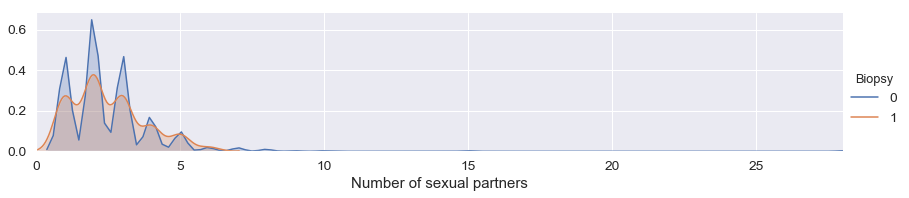

In [61]:
#Checking for Biopsy vs Sexual Partners

facet = sns.FacetGrid(data,hue = 'Biopsy',aspect = 4)
facet.map(sns.kdeplot,'Number of sexual partners',shade = True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

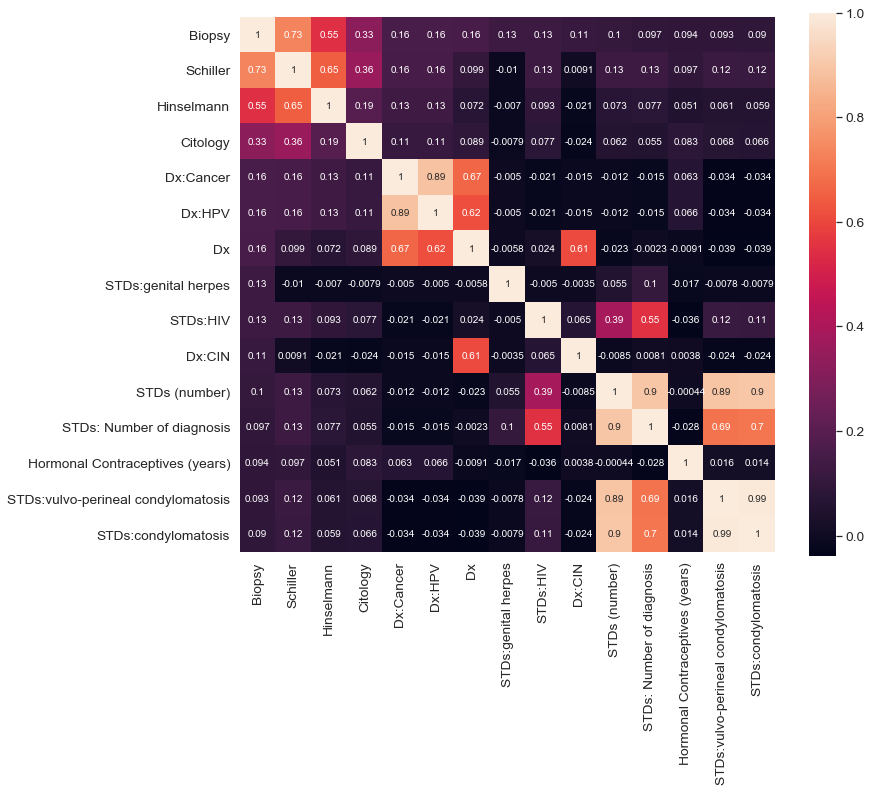

In [62]:
#Finding Correlation between columns. 

#As the number of columns are large, we will select top 15 columns having high correlation

corr = data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [66]:
#Splitting the dataset into Dependent and Independent varialble

x = data.iloc[:,:46]
y = data.iloc[:,46]

print(x.shape)
print(y.shape)

(858, 46)
(858,)


In [108]:
#Splitting the dataset into Training and Test Set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 45)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(514, 46)
(344, 46)
(514,)
(344,)


In [83]:
x_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,...,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,26.694553,2.507782,17.095331,2.227626,1.126789,0.390670,1.799284,0.425564,0.153696,0.054475,...,0.007782,0.974708,0.025292,0.968872,0.031128,0.957198,0.042802,0.951362,0.048638,0.918288
std,8.825694,1.432339,2.779881,1.452542,3.414138,1.704997,3.127092,1.824479,0.549425,0.227173,...,0.087958,0.157163,0.157163,0.173834,0.173834,0.202607,0.202607,0.215320,0.215320,0.274192
min,13.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,84.000000,15.000000,29.000000,11.000000,24.000000,22.000000,20.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [88]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#Creating Model
model = LogisticRegression()

#Fitting the model
model.fit(x_train, y_train)

#Predicting
y_pred = model.predict(x_test)

C:\Users\akjaiswal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
#Calculating Accuracies

print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.997093023255814
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      0.97      0.98        32

   micro avg       1.00      1.00      1.00       344
   macro avg       1.00      0.98      0.99       344
weighted avg       1.00      1.00      1.00       344

[[312   0]
 [  1  31]]


In [99]:
#SVM

from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#Calculating Accuracies

print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

#Classification Report
print(classification_report(y_test,y_pred))

#Confussion Matrix
print(confusion_matrix(y_test,y_pred))

Training Accuracy:  0.9494163424124513
Testing Accuracy:  0.9186046511627907
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       312
           1       1.00      0.12      0.22        32

   micro avg       0.92      0.92      0.92       344
   macro avg       0.96      0.56      0.59       344
weighted avg       0.93      0.92      0.89       344

[[312   0]
 [ 28   4]]


C:\Users\akjaiswal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [104]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)


#Calculating Accuracies

print("Training Data Accuracy:" , model.score(x_train,y_train))
print("Test Data Accuracy:" , model.score(x_test,y_test))

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

Training Data Accuracy: 1.0
Test Data Accuracy: 0.9912790697674418
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       312
           1       1.00      0.91      0.95        32

   micro avg       0.99      0.99      0.99       344
   macro avg       1.00      0.95      0.97       344
weighted avg       0.99      0.99      0.99       344

[[312   0]
 [  3  29]]


C:\Users\akjaiswal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [109]:
from sklearn.tree import DecisionTreeClassifier

# creating the model
model = DecisionTreeClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00        32

   micro avg       1.00      1.00      1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]
